# Introduction 

The data set GoogleAppStore reviews for mobile application, and also label for positive, negative and neutral label.

*The content predict the positive, negative and neutral tags of the reviews with NLP.*

# Content 

* Importing libraries.
* Trying to understand data. 
* Create a new data frame for replies and labels(Concat feature).
* Dropping NaN replies from data frame.
* Pick the indices for testing preprocessing processes 
  * Remove the redundant strings(these are ':' , ':)' , '//'...).
  * Split to words.
  * Lemmazation. 
* The processes that we testing on one indices implement on data.
  * Bag of words.
  * Create the 'Sparce Matrix' for bag of words.
  * The most use words, with data visiulazation
* Learning Time!
  * Split the train and test data. 
  * Training with Random Forest.
  * Training with Logistic Regression
* Confusion matrixes
  * Random Forest
  * Logistic Regression

# Importing libraries

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('dark')
import warnings
warnings.filterwarnings('ignore')

# Trying to understand data

In [97]:
df = pd.read_csv('googleplaystore_user_reviews.csv' , encoding = 'latin1')

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [99]:
df.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
7,10 Best Foods for You,NaN,NaN,NaN,NaN
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000


# Create a new data frame for replies and labels(Concat feature)

In [100]:
data = pd.concat([df['Translated_Review'] , df['Sentiment']] , axis = 1)

In [101]:
data.head(20)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
2,NaN,NaN
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
6,Amazing,Positive
7,NaN,NaN
8,"Looking forward app,",Neutral
9,It helpful site ! It help foods get !,Neutral


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Translated_Review  37427 non-null  object
 1   Sentiment          37432 non-null  object
dtypes: object(2)
memory usage: 1004.7+ KB


# Dropping NaN replies from data frame.

In [103]:
# control the nan value count 
data.isnull().sum()

Translated_Review    26868
Sentiment            26863
dtype: int64

In [104]:
data.dropna(axis = 0 , inplace = True) 

In [105]:
data.isnull().sum()

Translated_Review    0
Sentiment            0
dtype: int64

* Succesful dropping processes

# Pick the indices for testing preprocessing processes

In [106]:
data.head(20)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,This help eating healthy exercise regular basis,Positive
3,Works great especially going grocery store,Positive
4,Best idea us,Positive
5,Best way,Positive
6,Amazing,Positive
8,"Looking forward app,",Neutral
9,It helpful site ! It help foods get !,Neutral
10,good you.,Positive
11,Useful information The amount spelling errors ...,Positive


* We will use '9' indice for testing preprocessing processes

### Remove the redundant strings(these are ':' , ':)' , '//'...)

In [107]:
import re 
test_description = data.Translated_Review[9]
text = re.sub("[^a-zA-Z]" , " " , test_description) # converting with space that redundant strings
text = text.lower() # converting lower case all words 
text

'it helpful site   it help foods get  '

* Succesfully processes

# Split to words

In [108]:
import nltk
nltk.download("stopwords")
nltk.download("punkt")
from nltk.corpus import stopwords
text = nltk.word_tokenize(text) #separate all words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\erdmk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erdmk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [109]:
text

['it', 'helpful', 'site', 'it', 'help', 'foods', 'get']

* Succesfully processes

# Lemmazation

In [110]:
import nltk as nlp
lemma = nlp.WordNetLemmatizer()

text = [lemma.lemmatize(word) for word in text] # Words are converted general type with function(foods-> food)
text = " ".join(text) # concat the word and returning to reply types again

In [111]:
text

'it helpful site it help food get'

# The processes that we test on one indices implement on data

### Bag of words

In [18]:
# create list for texts
text_lists = []

# implement the all data 
for i in data.Translated_Review:
    # remove the strings(: , :) , // ...)
    text = re.sub("[^a-zA-Z]" , " " , i)
    text = text.lower()
    
    # tokenize words 
    text = nltk.word_tokenize(text)
    
    # lemmazation
    text = [lemma.lemmatize(word) for word in text]
    text = " ".join(text)
    
    # appaending replies list 
    text_lists.append(text)

text_lists

['i like eat delicious food that s i m cooking food myself case best food help lot also best before shelf life',
 'this help eating healthy exercise regular basis',
 'work great especially going grocery store',
 'best idea u',
 'best way',
 'amazing',
 'looking forward app',
 'it helpful site it help food get',
 'good you',
 'useful information the amount spelling error question validity information shared once fixed star given',
 'thank you great app add arthritis eye immunity kidney liver detox food please',
 'greatest ever completely awesome maintain health this must ppl there love it',
 'good health good health first priority',
 'health it s important world either life think',
 'mr sunita bhati i thankful developer to make kind app really good healthy food body',
 'very useful in diabetes age i need control sugar thanks',
 'one greatest apps',
 'good nice',
 'healthy really helped',
 'god health',
 'health should always be top priority on mysg',
 'an excellent a useful',
 'i found 

### Create the 'Sparce Matrix' for bag of words.

In [112]:
from sklearn.feature_extraction.text import CountVectorizer
# we take the most used 20000 words in data 
max_feature = 2000 

# remove the(and , that , or ...)
count_vectorizer = CountVectorizer(max_features = max_feature , stop_words = 'english')

# create sparce matrix 
sparce_matrix = count_vectorizer.fit_transform(text_lists).toarray() 

# the most use words 
most_use_words = count_vectorizer.get_feature_names()
print('the most use words : {}' .format(most_use_words[50:100]))

sparce_matrix

the most use words : ['ai', 'aid', 'air', 'airline', 'alarm', 'album', 'alert', 'algorithm', 'allow', 'allowed', 'allowing', 'allows', 'alot', 'alright', 'alternative', 'amazing', 'amazon', 'american', 'anatomy', 'android', 'angry', 'animal', 'animation', 'anime', 'annoyed', 'annoying', 'answer', 'anti', 'anxiety', 'anymore', 'anytime', 'anyways', 'apart', 'apartment', 'apk', 'app', 'apparently', 'appear', 'appears', 'apple', 'application', 'apply', 'appointment', 'appreciate', 'appreciated', 'apps', 'area', 'arena', 'arrow', 'art']


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### The most use words, with data visiulazation

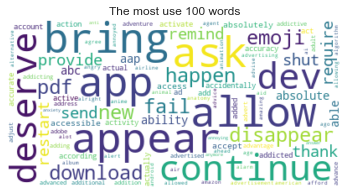

In [113]:
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size = 50, max_words = 100, background_color="white").generate(" ".join(most_use_words))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('The most use 100 words')
plt.show()

# Learning Time!

### Encoding labels 

In [114]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data.iloc[:,1] = le.fit_transform(data.iloc[:,1])
data.head(20)

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,2
1,This help eating healthy exercise regular basis,2
3,Works great especially going grocery store,2
4,Best idea us,2
5,Best way,2
6,Amazing,2
8,"Looking forward app,",1
9,It helpful site ! It help foods get !,1
10,good you.,2
11,Useful information The amount spelling errors ...,2


* Positive -> 2
* Neutral -> 1
* Negative -> 0

### Split the train and test data

In [71]:
# declaration X and y 
X = sparce_matrix # bag of words 
y = data.iloc[:,1].values # labels 

In [72]:
y.shape

(37427,)

In [73]:
X.shape

(37427, 2000)

In [74]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

### Training with Random Forest.

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 3 , random_state = 42)
rf.fit(X_train , y_train)

RandomForestClassifier(n_estimators=3, random_state=42)

In [76]:
rf.score(X_test , y_test)

0.859337429869089

### Training with Logistic Regression 

In [77]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , y_train) 

LogisticRegression()

In [78]:
lr.score(X_test , y_test)

0.8991450707988244

# Confusion Matrixes

In [120]:
y_pred_rf = rf.predict(X_test) # random forest's prediction 
y_pred_lr = lr.predict(X_test) # logistic regression prediction
y_true = y_test # our real labels 

### Random Forest

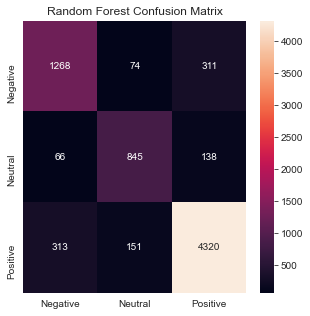

In [117]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_true , y_pred_rf)
labels = ['Negative' , 'Neutral' ,  'Positive']

f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_rf , annot = True , fmt = '.0f')
plt.title('Random Forest Confusion Matrix')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()

### Logistic Regression

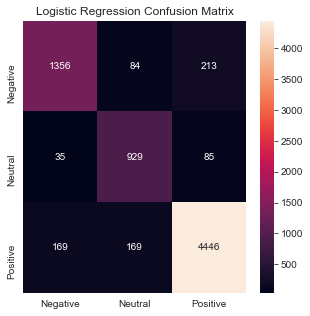

In [121]:
cm_lr = confusion_matrix(y_true , y_pred_lr)
labels = ['Negative' , 'Neutral' ,  'Positive']


f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm_lr , annot = True , fmt = '.0f')
plt.title('Logistic Regression Confusion Matrix')
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show()